In [3]:
import csv
import math

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#           0/1     1/2  2/3     3/4   4/5              5/6          6/7
# format is station,date,measure,value,measurement flag,quality flag,source flag

In [56]:
stations = {}

with open('2019_TMAX.csv') as f:
    reader = csv.reader(f)
    for line in reader:
        if line[5] != '':
            continue  # skip quality problems
        value = int(line[3]) / 10
        stations.setdefault(line[0], {}).setdefault('maxes', []).append(value)

with open('2019_TMIN.csv') as f:
    reader = csv.reader(f)
    for line in reader:
        if line[5] != '':
            continue  # skip quality problems
        value = int(line[3]) / 10
        stations.setdefault(line[0], {}).setdefault('mins', []).append(value)

In [57]:
len(stations)

13946

In [62]:
min_days = 1
low_data = [station for station, data in stations.items()
            if len(data.get('maxes', [])) < min_days or
               len(data.get('mins', [])) < min_days]

In [63]:
len(low_data)

104

In [64]:
for station in low_data:
    del stations[station]

In [65]:
len(stations)

13842

In [66]:
cold, hot = 4, 27

In [67]:
scores = []
for station, data in stations.items():
    heat = [(temp - hot)**2 if temp > hot else 0
            for temp in data['maxes']]
    heat = (sum(heat) / len(heat))**0.5
    cool = [(temp - cold)**2 if temp < cold else 0
            for temp in data['mins']]
    cool = (sum(cool) / len(cool))**0.5
    scores.append([station, heat, cool, heat + cool])

In [68]:
len(scores)

13842

In [69]:
scores.sort(key=lambda line: line[3])

In [70]:
scores[:10]

[['ASN00009871', 0.0, 0.0, 0.0],
 ['ASN00091245', 0.0, 0.0, 0.0],
 ['CI000085585', 0.0, 0.0, 0.0],
 ['IDM00097780', 0.0, 0.0, 0.0],
 ['NZ000093994', 0.0, 0.0, 0.0],
 ['COM00080112', 0.0, 0.0, 0.0],
 ['ECM00084226', 0.0, 0.0, 0.0],
 ['ECM00084270', 0.0, 0.0, 0.0],
 ['PE000084752', 0.0, 0.0, 0.0],
 ['MOM00060220', 0.0, 0.0, 0.0]]

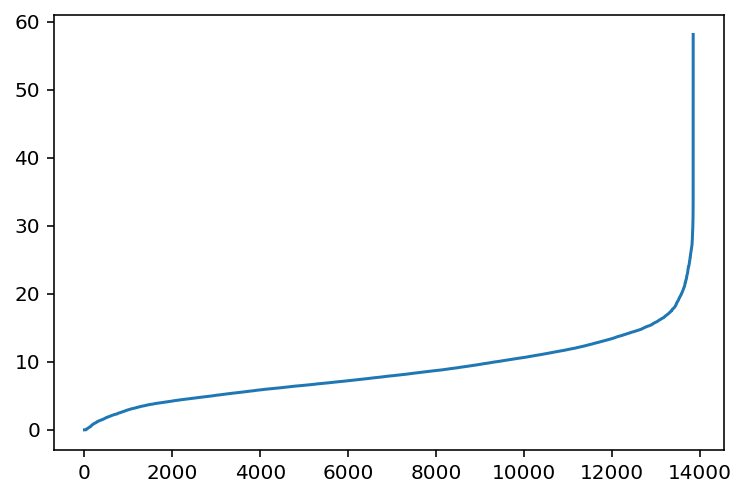

In [71]:
# total
plt.plot([line[3] for line in scores])

In [72]:
# _very_ few places are habitable!

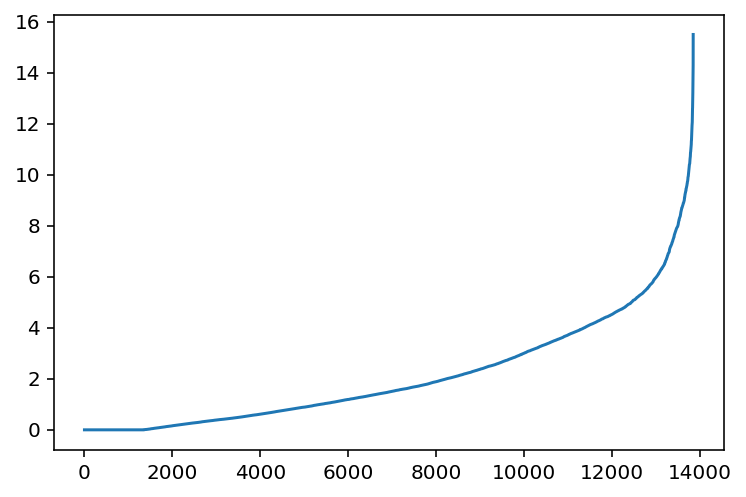

In [73]:
# heat
scores.sort(key=lambda line: line[1])
plt.plot([line[1] for line in scores])

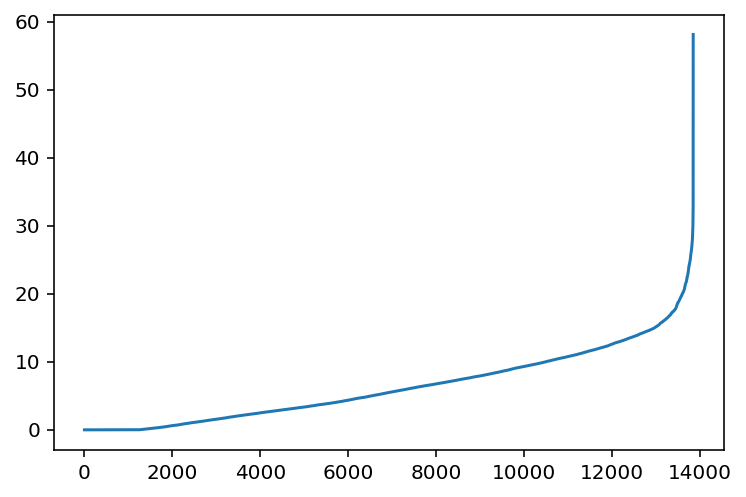

In [74]:
# cool
scores.sort(key=lambda line: line[2])
plt.plot([line[2] for line in scores])

In [75]:
# definitely more violation for cold...
# should I adjust the targets?

In [76]:
locations = {}
with open('ghcnd-stations.txt') as f:
    for line in f:
        line = line.split()
        locations[line[0]] = [float(line[1]), float(line[2]), ' '.join(line[4:])]

In [77]:
results = []
for line in scores:
    if line[0] not in locations:
        continue
    results.append(line + locations[line[0]])

In [78]:
results[0]

['ASN00009871', 0.0, 0.0, 0.0, -34.8361, 116.0308, 'WINDY HARBOUR 94640']

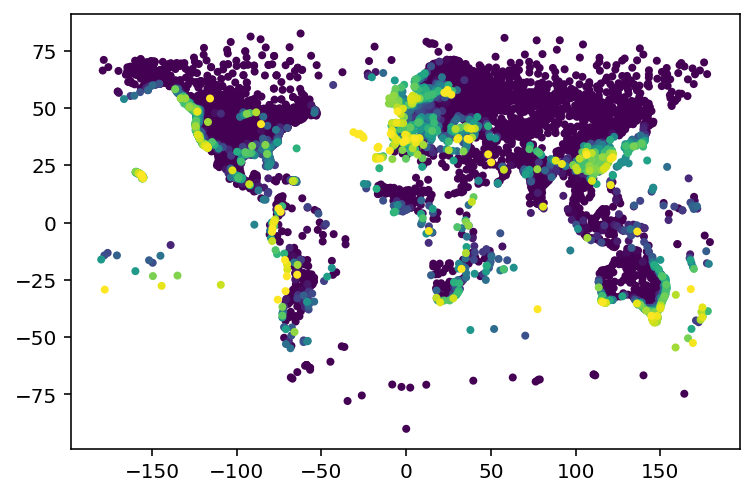

In [79]:
results.sort(key=lambda line: -line[3])  # draw good places last
plt.scatter([line[5] for line in results],
            [line[4] for line in results],
            c=[5 - line[3] if line[3] < 5 else 0 for line in results],
            marker='.')

In [112]:
# okay there's coverage, but the results are a lot noisier now...